<a href="https://colab.research.google.com/github/CarolinaBio2/Desafio-3-Biopy/blob/main/desafio_3_m_dulo_5_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.6 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez
Entrez.email = "carolinabiomed17@gmail.com"

In [ ]:
#1 - Baixe os genomas das espécies indicadas, anote com a ferramenta antiSMASH e plote um gáfico comparativo entre os sítios de ligação de proteínas anotados em cada genoma.
#Dica 1: Coloque para anotar com todas as features possíveis, selecionando “All on” na seção “Extra features” na página de input da ferramenta antiSMASH.
#Dica 2:  itere sobre a feature aSDomain, ou outra de seu interesse, nos arquivos de anotação.

In [ ]:
#IDs dos genomas
genome_ids = []
with open("genomasdesafio3") as arquivo:
  genome_ids = arquivo.readlines()

In [ ]:
for genome_id in genome_ids:
  genome_id = genome_id.strip()
  handle = Entrez.efetch(db="nucleotide", id=genome_id, rettype="gbwithparts", retmode="text")
  with open(f"{genome_id}.gbff", "w") as arquivo:
    arquivo.write(handle.read())
  handle.close()
  print(f"arquivos fasta e GBFF para o genoma {genome_id} baixados com sucesso.")
  #Pasta de arquivo gbff gerada com as features e qualifiers do bacillus s. (pasta NC_000964.3.gbff)


arquivos fasta e GBFF para o genoma NC_000964.3 baixados com sucesso.
arquivos fasta e GBFF para o genoma NC_000964.3 baixados com sucesso.


In [ ]:
import glob
from Bio import SeqIO
import matplotlib.pyplot as plt

In [ ]:
#Dicionário para armazenar os domínios por arquivo
listas_dominios = {}
#Iterar sobre cada arquivo .gbk na pasta
for arquivo in glob.glob('*.gbk'):
  print(arquivo)
  dominios_as = []  #Lista para armazenar os aSDomain do arquivo atual
  for registro in SeqIO.parse(arquivo, 'gb'):  #Iterar pelas features de cada record
    for feature in registro.features:
      if feature.type == 'aSDomain':   #Verificar se a feature é do tipo aSDomain
        if "aSDomain" in feature.qualifiers:
          dominios_as.extend(feature.qualifiers["aSDomain"])  #Adicionar os domínios
  listas_dominios[arquivo] = dominios_as  #Armazenar a lista de domínios para o arquivo atual
todos_dominios = sorted(set(dominio for dominios in listas_dominios.values() for dominio in dominios))

NC_000964.3.gbk
NC_002516.2.gbk


Arquivos: ['NC_000964.3.gbk', 'NC_002516.2.gbk']
Todos os dominios ['ACP', 'ACP_beta', 'AMP-binding', 'Aminotran_1_2', 'Aminotran_3', 'Aminotran_5', 'CAL_domain', 'Condensation', 'ECH', 'Epimerization', 'Heterocyclization', 'MT', 'NAD_binding_4', 'NRPS-COM_Nterm', 'Other_Sactipeptide_rSAM_RRE', 'PCP', 'PKS_AT', 'PKS_DH2', 'PKS_ER', 'PKS_KR', 'PKS_KS', 'PKS_PP', 'PP-binding', 'PqqD_RRE', 'Stand_Alone_Lasso_RRE', 'Subtilosin_rSAM_RRE', 'TD', 'TIGR00012', 'TIGR00013', 'TIGR00049', 'TIGR00059', 'TIGR00060', 'TIGR00066', 'TIGR00089', 'TIGR00110', 'TIGR00112', 'TIGR00128', 'TIGR00148', 'TIGR00174', 'TIGR00187', 'TIGR00221', 'TIGR00227', 'TIGR00229', 'TIGR00239', 'TIGR00244', 'TIGR00246', 'TIGR00254', 'TIGR00277', 'TIGR00282', 'TIGR00294', 'TIGR00326', 'TIGR00333', 'TIGR00369', 'TIGR00398', 'TIGR00399', 'TIGR00418', 'TIGR00421', 'TIGR00455', 'TIGR00456', 'TIGR00502', 'TIGR00518', 'TIGR00543', 'TIGR00558', 'TIGR00585', 'TIGR00589', 'TIGR00614', 'TIGR00621', 'TIGR00630', 'TIGR00651', 'TIGR00652

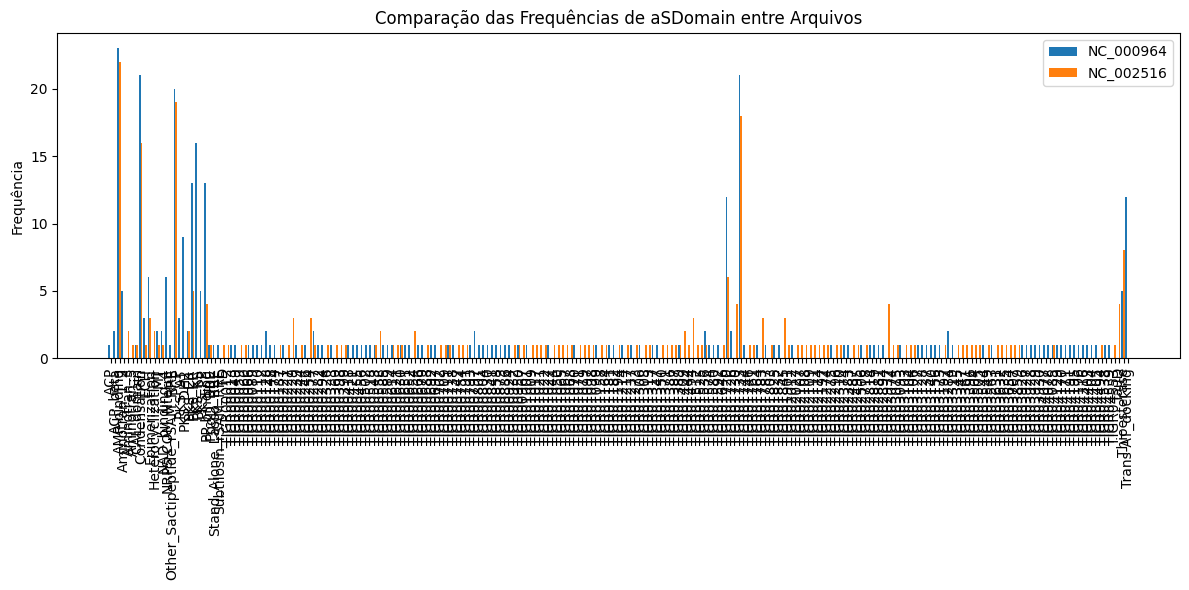

In [ ]:
#Preparar os dados para o gráfico
arquivos = list(listas_dominios.keys())
frequencias_dominios = {}
for arquivo in arquivos:
  frequencias = []
  for dominio in todos_dominios:
    frequencias.append(listas_dominios[arquivo].count(dominio))
  frequencias_dominios[arquivo] = frequencias
#Criar o gráfico -- você pode usar a biblioteca de sua preferência para gerar os gráficos (só conheço o biopython)
plt.figure(figsize=(12, 6))
x= range(len(todos_dominios))
largura = 0.4
for i, arquivo in enumerate(arquivos):  #Plotar as barras para cada arquivo
  plt.bar(
    [p + i * largura for p in x],
    frequencias_dominios[arquivo],
    width=largura,
    label=arquivo.split('.')[0]
  )

print("Arquivos:", list(listas_dominios.keys()))
# Lista de arquivos
print("Todos os dominios", todos_dominios)
# Lista de dominios esperados
print("Frequencias:", frequencias_dominios)  # Dicionario com contagens
for i, arquivo in enumerate(arquivos):
  print(f"Arquivo: {arquivo}, Frequências: {frequencias_dominios[arquivo]}")

#Adicionar rótulos e legendas
plt.xticks([o + largura for o in x], todos_dominios, rotation=90)
plt.ylabel("Frequência")
plt.title("Comparação das Frequências de aSDomain entre Arquivos")
plt.legend()
plt.tight_layout()
plt.savefig("dominios.png")
plt.show()

{'NC_000964.3.gbk': 41, 'NC_002516.2.gbk': 23}
file: NC_002516.2.gbk, count: 23


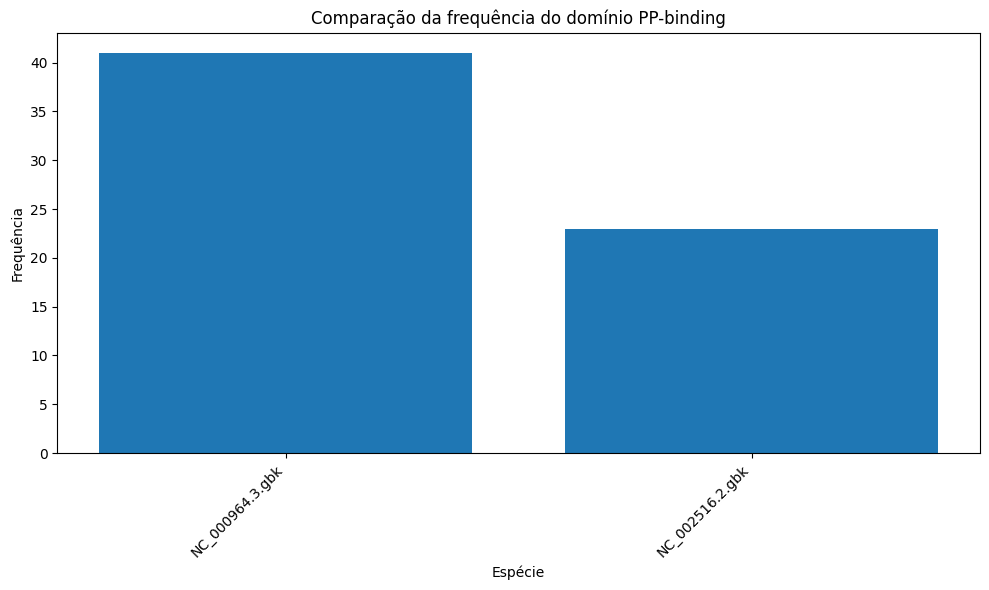

In [ ]:
#Escolher um ou mais domínios de interesse para melhor vizualização
import glob
from Bio import SeqIO
import matplotlib.pyplot as plt
#Criar um dicionário vazio para armazenar as contagens de PP-binding por arquivo
domain_counts = {}
#Iterar sobre cada arquivo .gbk na pasta
for file in glob.glob('*.gbk'):
  count = 0
  #Iterar pelas features de cada record
  for record in SeqIO.parse(file, 'genbank'):
    for feature in record.features:
      #Verificar se a feature é do tipo PFAM_domain e se tem o qualificador aSDomain
      if feature.type == 'PFAM_domain' and "aSDomain" in feature.qualifiers:
        if "PP-binding" in feature.qualifiers["aSDomain"]:  #Verificar se o dominínio de interesse PP-binding está presente e incrementar o contador
          count +=1
          #Armazenar a contagem do dicionário - nomedo_dicionario[chave]=valor
          domain_counts[file] = count
#Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(domain_counts.keys(), domain_counts.values())
plt.ylabel("Frequência")
plt.xlabel("Espécie")
plt.title("Comparação da frequência do domínio PP-binding")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.xlabel("Espécie")
plt.title("Comparação da frequência do domínio PP-binding")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("pp_binding.png")
print(domain_counts)
print(f"file: {file}, count: {count}")
plt.show()